In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# Гипотеза Н0 утверждает, что коэффициент корреляции генеральной совокупности равен 0
# Альтернативная гипотеза утверждает, что коэффициент корреляции генеральной совокупности не нравен 0

def cortest(corr, lenX):  
    
    #t value
    t = corr[0] * ((len(X) - 2) / (1 - corr[0]**2))**0.5
    print("data: x and y")
    print("t = {}, df = {}, p-value = {}".format(round(t,5), len(X)-2, round(stats.t.sf(np.abs(t), 48)*2,5)))

    # Use the Fisher transformation to get z
    z = np.arctanh(corr[0])
    #print("z value: {}".format(z))

    # And, the sigma value i.e standard error
    sigma = (1/((len(X)-3)**0.5))
    #print("sigma value: {}".format(sigma))

    # Get normal 95% interval probability density function for normal continuous random variable apply two-sided conditional formula
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
    
    #Finally take hyperbolic tangent to get interval values for 95%
    interval = np.tanh(cint)
    
    if corr != 0:
        print("alternative hypothesis: true correlation is not equal to 0")
    print("95 percent confidence interval:")
    print(interval)
    print("sample estimates:")
    print("cor")
    print(corr[0])

In [6]:
# так вычисляем корреляцию
X = stats.norm.rvs(loc=0, scale=1, size=50)
Y = stats.norm.rvs(loc=0, scale=1, size=50)
corr = stats.pearsonr(X, Y)
corr

PearsonRResult(statistic=0.04201760980116756, pvalue=0.7720284837652399)

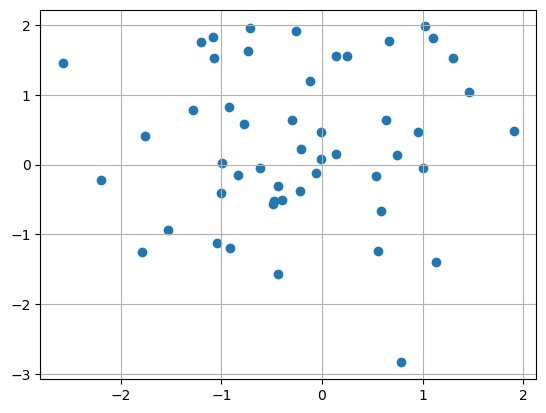

In [7]:
# так строим scatter plot
plt.scatter(X,Y)
plt.grid()
plt.show()


In [8]:
cortest((corr[0],), 50)

data: x and y
t = 0.29136, df = 48, p-value = 0.77203
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
[-0.23912682  0.31666181]
sample estimates:
cor
0.04201760980116756


b0: 24.460377324072766 b1 0.09517012417856534
y = 24.46 + 0.10 * x


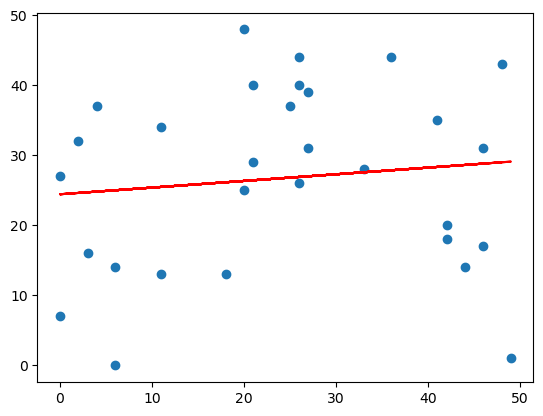

se:  0.1556001780358245
p_value: 0.5457154950415584
p_value(X < 0.61 or X > 0.61) > alpha. Do not reject H0
statsmodels:                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.3741
Date:                Sun, 05 Jan 2025   Prob (F-statistic):              0.546
Time:                        17:53:45   Log-Likelihood:                -119.17
No. Observations:                  30   AIC:                             242.3
Df Residuals:                      28   BIC:                             245.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

In [9]:
X = np.random.randint(0, 50, 30)
Y = np.random.randint(0, 50, 30)
 
plt.scatter(X, Y)

# H0: b1 = 0
# H1: b1 != 0

alpha = 0.05
df = len(Y) - 2
 
X_mean = np.mean(X)
Y_mean = np.mean(Y)

corr = np.sum((X - X_mean) * (Y - Y_mean)) / (np.sum((X - X_mean) ** 2) * np.sum((Y - Y_mean) ** 2)) ** 0.5

X_sd = np.std(X)
Y_sd = np.std(Y)

b1 = (Y_sd / X_sd) * corr
b0 = Y_mean - b1 * X_mean

print('b0:', b0, 'b1', b1)
print(f'y = {b0:.2f} + {b1:.2f} * x')

plt.plot(X, b0 + b1 * X, color='red')
plt.show()

s2 = np.sum((Y - (b0 + b1 * X)) ** 2) / (df) # оценка дисперсии остатков
se = (s2 / (sum((X - X_mean) ** 2))) ** 0.5

print('se: ', se)

t_value = b1 / se
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df))

print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X < {t_value:.2f} or X > {t_value:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {t_value:.2f} or X > {t_value:.2f}) < alpha. Reject H0')

X2 = sm.add_constant(X)

model = sm.OLS(Y, X2) 
results = model.fit()

print('statsmodels: ', results.summary())

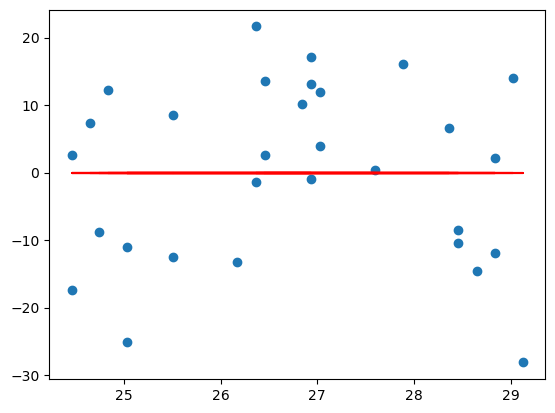

(array([2., 0., 2., 7., 0., 3., 5., 3., 6., 2.]),
 array([-28.12371341, -23.14772005, -18.17172669, -13.19573333,
         -8.21973997,  -3.24374661,   1.73224675,   6.70824011,
         11.68423347,  16.66022683,  21.63622019]),
 <BarContainer object of 10 artists>)

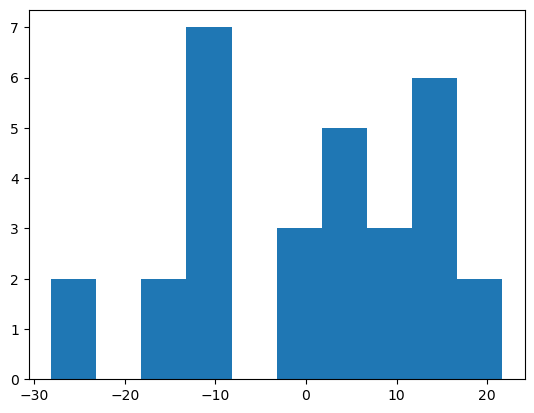

In [10]:
# Анализ остатков

SSres = pd.Series([y - (b0 + b1 * x) for y, x in zip(Y, X)])

Values = pd.Series([(b0 + b1 * x) for y, x in zip(Y, X)])

plt.scatter(y = SSres, x = Values)
plt.plot(Values, [0] * len(Values), color='red')
plt.show()

plt.hist(SSres)